# I
* remove low frequency product attributes
* replace product attributes with wonka attributes
* rename data columns

# II
* make statistics df
* recreate margin dashboard

In [45]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import random
import scipy.stats

In [2]:
opportunity = pd.read_csv('../data/days.csv', index_col=[0,1,2,3])
annual_operating = pd.read_csv('../data/annual.csv', index_col=[0,1])
stats = pd.read_csv('../data/scores.csv')
quantiles = np.arange(50,101,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
lines = opportunity.index.get_level_values(1).unique()
asset_metrics = ['Yield', 'Rate', 'Uptime']
groupby = ['Line', 'Product group']
oee = pd.read_csv('../data/oee.csv')
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])
oee = oee.loc[oee['Rate'] < 2500]
res = oee.groupby(groupby)[asset_metrics].quantile(quantiles)

df = pd.read_csv('../data/products.csv')
descriptors = df.columns[:8]
production_df = df
production_df['product'] = production_df[descriptors[2:]].agg('-'.join, axis=1)
production_df = production_df.sort_values(['Product Family', 'EBIT'],
                                          ascending=False)

stat_df = pd.read_csv('../data/category_stats.csv')
old_products = df[descriptors].sum(axis=1).unique().shape[0]
weight_match = pd.read_csv('../data/weight_match.csv')

In [3]:
df = df[['Product Family',
 'Base Polymer',
 'Base Type',
 'Additional Treatment',
 'Color Group',
 'Width Material Attri',
 'Thickness Material A',
 'Net Sales Quantity in KG',
 'Adjusted EBITDA']]

In [4]:
print(df['Product Family'].value_counts())
grouped = df['Product Family'].value_counts().loc[lambda x: x > 50]
df = df.loc[df['Product Family'].isin(grouped.index)].reset_index(drop=True)

Shrink Sleeve           1446
Dec. Surfaces/others     454
Cards Core               280
Cards Overlay            252
Tape                      82
Construction              63
Cooling Tower             33
Print                      8
Other Technical            7
PSL                        7
Roll Sleeve                5
Secondary business         4
Stationery                 1
Mapping Default            1
Name: Product Family, dtype: int64


In [5]:
print(df["Base Polymer"].value_counts())
grouped = df['Base Polymer'].value_counts().loc[lambda x: x > 10]
df = df.loc[df['Base Polymer'].isin(grouped.index)].reset_index(drop=True)

PVC     1710
PETG     836
PP        18
APET       7
PS         5
#          1
Name: Base Polymer, dtype: int64


In [6]:
print(df["Base Type"].value_counts())
grouped = df['Base Type'].value_counts().loc[lambda x: x > 2]
df = df.loc[df['Base Type'].isin(grouped.index)].reset_index(drop=True)

G10F22    625
278/01    216
225/05    215
147/07    157
146/19    115
148/07    115
230/18     88
148/05     82
230/58     72
146/01     72
145/01     69
252/01     65
G25F21     58
G10F33     46
G10F12     44
240/15     42
240/13     37
179/01     34
253/57     32
252/29     31
153/07     28
202/14     23
252/05     23
419/58     23
419/59     20
C8CF03     18
G10T22     15
219/08     12
253A57     12
223/01     12
         ... 
280/06      3
G19F12      3
419/05      3
230V19      3
253/15      2
G19T33      2
203/01      2
G14F22      2
419/52      2
252D01      2
252P01      1
G05T00      1
278/30      1
G10T21      1
459/01      1
G14F12      1
G01T01      1
221/01      1
253F57      1
240/91      1
G29F63      1
G80V22      1
201/50      1
G10J22      1
253/14      1
125/23      1
203/31      1
253A58      1
G10F42      1
G10T12      1
Name: Base Type, Length: 80, dtype: int64


In [7]:
print(df["Additional Treatment"].value_counts())
grouped = df['Additional Treatment'].value_counts().loc[lambda x: x > 2]
df = df.loc[df['Additional Treatment'].isin(grouped.index)].reset_index(drop=True)

ZZZ     797
T52     414
T38     172
T05     163
T25     157
SB6     126
T35     115
T30      82
T02      69
H140     65
T42      58
T43      46
T60      44
T45      24
T15      23
T27      18
T04      16
T32      16
T00      15
F_K_     14
F___     13
F_AA     11
SB5      10
FWBA      8
F_SA      7
F9UA      6
F_O_      6
C450      4
F4SA      4
F_LA      3
D310      3
F8QH      2
F_TL      2
F__A      2
F1AA      2
SB4       2
F1O_      2
F_PA      1
F8Q_      1
F_OA      1
F_L_      1
F9VA      1
SB8       1
F_P_      1
F_N_      1
F_T_      1
F_BA      1
F_WA      1
Name: Additional Treatment, dtype: int64


In [8]:
print(df['Color Group'].value_counts())
grouped = df['Color Group'].value_counts().loc[lambda x: x > 2]
df = df.loc[df['Color Group'].isin(grouped.index)].reset_index(drop=True)

GC    1336
WH     459
OP     292
TR     112
BK      67
MC      57
TP      57
TL      51
DF      37
GY      20
YE       8
BL       6
BW       4
GR       1
RD       1
BC       1
Name: Color Group, dtype: int64


In [9]:
df.columns

Index(['Product Family', 'Base Polymer', 'Base Type', 'Additional Treatment',
       'Color Group', 'Width Material Attri', 'Thickness Material A',
       'Net Sales Quantity in KG', 'Adjusted EBITDA'],
      dtype='object')

Cakes
* Sponge: lots of eggwhite no baking powder
* Pound: equal parts flour, sugar, butter, and eggs
* Butter: butter is a main ingredient
* Cheese: cheese is a main ingredient
* Chiffon: vegetable oil is a main ingredient
* Tiramisu: layered and contains caffeine

In [10]:
print(df['Product Family'].unique())
cake_families = ['Chiffon', 'Tiramisu', 'Sponge', 
                 'Pound', 'Butter', 'Cheese']
family_dict = dict()
for fam, cake in zip(df['Product Family'].unique(), cake_families):
    family_dict[fam] = cake
print(family_dict)
df = df.replace({'Product Family': family_dict})

['Cards Core' 'Cards Overlay' 'Construction' 'Dec. Surfaces/others'
 'Shrink Sleeve' 'Tape']
{'Cards Core': 'Chiffon', 'Cards Overlay': 'Tiramisu', 'Construction': 'Sponge', 'Dec. Surfaces/others': 'Pound', 'Shrink Sleeve': 'Butter', 'Tape': 'Cheese'}


Bases

* chocolate outer: outer chocolate layer
* candy outer: hard candy outer layer
* jelly filled: jelly inner filling

In [11]:
print(df['Base Polymer'].value_counts())
bases = ['Chocolate Outer', 'Candy Outer', 'Jelly Filled']
bases_dict = dict()
for poly, base in zip(df['Base Polymer'].unique(), bases):
    bases_dict[poly] = base
df = df.replace({'Base Polymer': bases_dict})

PVC     1670
PETG     818
PP        18
Name: Base Polymer, dtype: int64


In [12]:
print(df['Base Type'].value_counts())
aromas = pd.read_csv('aromas.txt', delimiter='\n')
aromas = [i for i in list(aromas['A'].values) if len(i) > 1]
random.shuffle(aromas)
aromas_dict = dict()
for index, base in enumerate(df['Base Type'].unique()):
    aromas_dict[base] = aromas[index]
df = df.replace({'Base Type': aromas_dict})

G10F22    625
278/01    215
225/05    214
147/07    157
148/07    115
146/19    115
230/18     88
148/05     82
146/01     72
230/58     71
145/01     69
252/01     58
G25F21     57
G10F33     46
G10F12     44
240/15     42
240/13     37
179/01     33
252/29     31
153/07     28
253/57     26
252/05     23
202/14     23
419/58     23
419/59     20
C8CF03     18
G10T22     15
219/08     12
223/01     12
253A57     11
201/90      9
153/05      8
230/17      8
G29V63      8
202/11      8
219/13      8
219/19      7
G15V52      7
G19F22      6
201/01      5
252/92      5
253/63      4
205/01      4
205/31      4
160I38      4
G10T34      4
160I08      4
280/06      3
203/71      3
G10L22      3
230V19      3
279/12      3
419/05      3
G19F12      3
Name: Base Type, dtype: int64


In [13]:
print(df['Additional Treatment'].value_counts())
aromas_dict = dict()
random.shuffle(aromas)
for index, base in enumerate(df['Additional Treatment'].unique()):
    aromas_dict[base] = aromas[index]
df = df.replace({'Additional Treatment': aromas_dict})

ZZZ     797
T52     414
T38     172
T05     163
T25     157
SB6     126
T35     115
T30      82
T02      69
H140     65
T42      57
T43      46
T60      44
T45      24
T15      23
T27      18
T04      16
T32      16
T00      15
F_K_     14
F___     11
F_AA     11
SB5      10
FWBA      8
F_SA      7
F9UA      6
F_O_      6
C450      4
F4SA      4
D310      3
F_LA      3
Name: Additional Treatment, dtype: int64


In [14]:
print(df['Color Group'].unique())
print(len(df['Color Group'].unique()))
colors = ['Black', 'Opal', 'White', 'Teal', 'Amethyst',
          'Burgundy', 'Olive', 'Tiffany', 'Mint', 'Citrine',
          'Taupe', 'Slate', 'Rose']
colors_dict = dict()
for color, new_color in zip(df['Color Group'].unique(), colors):
    colors_dict[color] = new_color
df = df.replace({'Color Group': colors_dict})

['BK' 'OP' 'WH' 'TP' 'GC' 'TR' 'GY' 'DF' 'BW' 'YE' 'MC' 'BL' 'TL']
13


In [15]:
df.head()

,Product Family,Base Polymer,Base Type,Additional Treatment,Color Group,Width Material Attri,Thickness Material A,Net Sales Quantity in KG,Adjusted EBITDA
0,Chiffon,Chocolate Outer,Grand Mariner,Grapefruit,Black,310,320,1893.0,1660.21
1,Chiffon,Chocolate Outer,Grand Mariner,Grapefruit,Black,475,380,4021.0,1773.83
2,Chiffon,Chocolate Outer,Grand Mariner,Grapefruit,Black,510,320,2034.0,3112.05
3,Chiffon,Chocolate Outer,Grand Mariner,Grapefruit,Black,586,310,22650.0,21574.45
4,Chiffon,Chocolate Outer,Grand Mariner,Grapefruit,Black,621,380,4625.0,-58.04


In [16]:
df.columns = ['Base Cake', 'Truffle Type', 'Primary Flavor', 'Secondary Flavor',
       'Color Group', 'Width', 'Height',
       'Net Sales Quantity in KG', 'EBITDA']

In [17]:
df['Product'] = df[df.columns[:-2]].agg('-'.join, axis=1)

In [ ]:
delimiters

In [69]:
delimiters = df.columns[:-3]
moods_table = pd.DataFrame()
for delimiter in delimiters:
    grouped = df.groupby(delimiter)['EBITDA']
    group_with_values = grouped.apply(list)

    # bootstrap population of values based on groups
    pop = np.random.choice((np.concatenate(group_with_values)), 
                           size=int(1e3))
    
    for index, group in enumerate(group_with_values):
        stat, p, m, table = scipy.stats.median_test(group, pop)
        moods_table = pd.concat([moods_table, 
                                 pd.DataFrame([delimiter, group_with_values.index[index],
                                              stat, p, m, table]).T])
moods_table.columns = ['descriptor', 'group', 'pearsons', 'p_value', 'grand_median', 'table']
# moods_table.set_index('delimiter', inplace=True)
moods_table = moods_table.sort_values('p_value').reset_index(drop=True)

In [70]:
# table, is a contingency table where columns are
# the number of values above or below the grand median
# and rows are the samples
table

array([[  1, 499],
       [  0, 501]])

In [72]:
moods_table.loc[moods_table['p_value'] < 1e-3]

,descriptor,group,pearsons,p_value,grand_median,table
0,Secondary Flavor,Raspberry,109.443,1.29799e-25,-58.86,"[[17, 561], [140, 439]]"
1,Primary Flavor,Bavarian Cream,102.376,4.59206e-24,-124.86,"[[19, 559], [138, 441]]"
2,Secondary Flavor,Kiwi,96.7567,7.83918e-23,-49.98,"[[7, 550], [108, 450]]"
3,Primary Flavor,Lime,89.1633,3.6353e-21,-81.23,"[[9, 548], [106, 452]]"
4,Truffle Type,Candy Outer,69.6285,7.15945e-17,411.1,"[[498, 411], [320, 589]]"
5,Primary Flavor,Cucumber,65.2228,6.68908e-16,394.71,"[[392, 420], [233, 580]]"
6,Secondary Flavor,Cheesecake,59.2329,1.40072e-14,2.93,"[[7, 534], [75, 466]]"
7,Primary Flavor,Sassafras,59.2329,1.40072e-14,-59.61,"[[7, 534], [75, 466]]"
8,Secondary Flavor,Wintergreen,48.3663,3.5359e-12,494.92,"[[267, 440], [147, 560]]"
9,Base Cake,Sponge,38.1857,6.43216e-10,273.2,"[[51, 477], [5, 523]]"


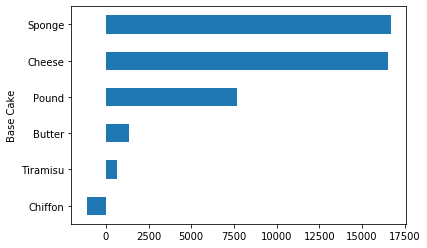

In [43]:
df.groupby('Base Cake')['EBITDA'].mean().sort_values().plot.barh()

In [44]:
stat_df

,descriptor,group,stat,p,m,table,score
0,Thickness Material A,47,17.162393,3.431632e-05,-114.56,[[ 0 1321]\n [ 19 1303]],0.000000
1,Base Type,148/07,102.065139,5.372574e-24,-114.56,[[ 4 1317]\n [ 111 1211]],0.036036
2,Base Type,148/05,70.735420,4.084922e-17,-114.56,[[ 3 1318]\n [ 79 1243]],0.037975
3,Base Type,419/58,17.528715,2.830011e-05,-114.56,[[ 1 1320]\n [ 22 1300]],0.045455
4,Base Type,C8CF03,12.574290,3.910898e-04,-114.56,[[ 1 1320]\n [ 17 1305]],0.058824
5,Additional Treatment,T25,104.021622,2.001202e-24,-114.56,[[ 16 1305]\n [ 141 1181]],0.113475
6,Additional Treatment,T00,8.516289,3.519816e-03,-114.56,[[ 2 1319]\n [ 15 1307]],0.133333
7,Base Type,419/59,8.504522,3.542650e-03,-114.56,[[ 3 1318]\n [ 17 1305]],0.176471
8,Base Type,230/58,31.503208,1.991111e-08,-114.56,[[ 12 1309]\n [ 60 1262]],0.200000
9,Color Group,TR,50.566130,1.152164e-12,-114.56,[[ 19 1302]\n [ 94 1228]],0.202128


In [ ]:
from jupyter_dash import JupyterDash

In [ ]:
def make_violin_plot(sort='Worst', select=[0,10], descriptors=None):

    if sort == 'Best':
        local_df = stat_df.sort_values('score', ascending=False)
        local_df = local_df.reset_index(drop=True)
    else:
        local_df = stat_df
    if descriptors != None:
        local_df = local_df.loc[local_df['descriptor'].isin(descriptors)]
    fig = go.Figure()
    for index in range(select[0],select[1]):
        x = df.loc[(df[local_df.iloc[index]['descriptor']] == \
            local_df.iloc[index]['group'])]['Adjusted EBITDA']
        y = local_df.iloc[index]['descriptor'] + ': ' + df.loc[(df[local_df\
            .iloc[index]['descriptor']] == local_df.iloc[index]['group'])]\
            [local_df.iloc[index]['descriptor']]
        name = '€ {:.0f}'.format(x.median())
        fig.add_trace(go.Violin(x=y,
                                y=x,
                                name=name,
                                box_visible=True,
                                meanline_visible=True))
    fig.update_layout({
                "plot_bgcolor": "#F9F9F9",
                "paper_bgcolor": "#F9F9F9",
                "title": 'Adjusted EBITDA by Product Descriptor (Median in Legend)',
                "yaxis.title": "EBITDA (€)",
                "height": 400,
                "margin": dict(
                       l=0,
                       r=0,
                       b=0,
                       t=30,
                       pad=4
   ),
                })

    return fig

def make_sunburst_plot(clickData=None, toAdd=None, col=None, val=None):
    if clickData != None:
        col = clickData["points"][0]['x'].split(": ")[0]
        val = clickData["points"][0]['x'].split(": ")[1]
    elif col == None:
        col = 'Thickness Material A'
        val = '47'

    desc = list(descriptors[:-2])
    if col in desc:
        desc.remove(col)
    if toAdd != None:
        for item in toAdd:
            desc.append(item)
    test = df.loc[df[col] == val]
    fig = px.sunburst(test, path=desc[:], color='Adjusted EBITDA', title='{}: {}'.format(
        col, val),
        color_continuous_scale=px.colors.sequential.Viridis
                     )
    fig.update_layout({
                "plot_bgcolor": "#F9F9F9",
                "title": '(Select in Violin) {}: {}'.format(col,val),
                "paper_bgcolor": "#F9F9F9",
                "height": 400,
                "margin": dict(
                       l=0,
                       r=0,
                       b=0,
                       t=30,
                       pad=4
   ),
                })
    return fig

def make_ebit_plot(df, select=None, sort='Worst', descriptors=None):
    families = df[df.columns[0]].unique()
    colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3',\
              '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
    colors_cycle = cycle(colors)
    grey = ['#7f7f7f']
    color_dic = {'{}'.format(i): '{}'.format(j) for i, j  in zip(families,
                                                                 colors)}
    grey_dic =  {'{}'.format(i): '{}'.format('#7f7f7f') for i in families}
    fig = go.Figure()


    if select == None:
        for data in px.scatter(
                df,
                x='Product',
                y='Adjusted EBITDA',
                color='Product Family',
                color_discrete_map=color_dic,
                opacity=1).data:
            fig.add_trace(
                data
            )

    elif select != None:
        color_dic = {'{}'.format(i): '{}'.format(j) for i, j  in zip(select,
                                                                     colors)}
        for data in px.scatter(
                df,
                x='Product',
                y='Adjusted EBITDA',
                color=df.columns[0],

                color_discrete_map=color_dic,
                opacity=0.09).data:
            fig.add_trace(
                data
            )

        if sort == 'Best':
            local_df = stat_df.sort_values('score', ascending=False)
        elif sort == 'Worst':
            local_df = stat_df


        new_df = pd.DataFrame()
        if descriptors != None:
            local_df = local_df.loc[local_df['descriptor'].isin(descriptors)]
        for index in select:
            x = df.loc[(df[local_df.iloc[index]\
                ['descriptor']] == local_df.iloc[index]['group'])]
            x['color'] = next(colors_cycle) # for line shapes
            new_df = pd.concat([new_df, x])
            new_df = new_df.reset_index(drop=True)
        for data in px.scatter(
                new_df,
                x='Product',
                y='Adjusted EBITDA',
                color=df.columns[0],

                color_discrete_map=color_dic,
                opacity=1).data:
            fig.add_trace(
                data
            )
        shapes=[]

        for index, i in enumerate(new_df['product']):
            shapes.append({'type': 'line',
                           'xref': 'x',
                           'yref': 'y',
                           'x0': i,
                           'y0': -4e5,
                           'x1': i,
                           'y1': 4e5,
                           'line':dict(
                               dash="dot",
                               color=new_df['color'][index],)})
        fig.update_layout(shapes=shapes)
    fig.update_layout({
            "plot_bgcolor": "#F9F9F9",
            "paper_bgcolor": "#F9F9F9",
            "title": 'Adjusted EBITDA by Product Family',
            "yaxis.title": "EBITDA (€)",
            "height": 500,
            "margin": dict(
                   l=0,
                   r=0,
                   b=0,
                   t=30,
                   pad=4
),
            "xaxis.tickfont.size": 8,
            # "font":dict(
            #     size=8,
            # ),
            })
    return fig